# ML Project: COVID-19 Spreading Speed Prediction.
Fall Semester 2020/2021

## Author: Ahmad Arrabi                                                                                                              
ID: 20170534

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Preprocessing and Data Cleaning

Load the dataset that was created previously

In [27]:
countries_data=pd.read_csv('2%.csv') #2%
countries_data.drop('index',axis='columns', inplace=True)
countries_data

,Country,Population,Density,Date to reach 1%,total_cases,total_tests,tests_per_case,extreme_poverty,human_development_index,hospital_beds_per_thousand,...,Climate,Tourism,Date_FirstConfirmedCase,Latitude,Longtitude,Lockdown_Date,Lockdown_Type,GDP 2018,HF score 2017,literacy rate
0,Albania,2877239,105,2020-11-17,29126.0,152209.0,2.4,1.1,0.785,2.89,...,3.0,5340000,2020-03-10,41.153332,20.168331,2020-03-08,Full,13364.155400,7.84,97.6
1,Andorra,77287,164,2020-06-02,844.0,85772.0,6.4,NaN,0.858,NaN,...,3.0,3042000,2020-03-03,42.546245,1.601554,2020-03-16,Full,NaN,NaN,NaN
2,Argentina,45267449,17,2020-09-04,461882.0,1398352.0,2.0,0.6,0.825,5.00,...,3.0,6942000,2020-03-04,-38.416097,-63.616672,2020-03-20,Full,20610.568550,6.86,98.1
3,Armenia,2964219,104,2020-07-08,29820.0,NaN,NaN,1.8,0.755,4.20,...,4.0,1652000,2020-03-02,40.069099,45.038189,2020-03-24,Full,10343.175590,7.42,99.8
4,Austria,9015361,109,2020-10-29,93949.0,2177572.0,4.1,0.7,0.908,7.37,...,3.0,30816000,2020-02-26,47.516231,14.550072,2020-03-16,Full,55454.689290,8.48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Ukraine,43686577,75,2020-11-05,443630.0,3521175.0,2.0,0.1,0.751,8.80,...,3.0,14104000,2020-03-04,48.379433,31.165580,2020-03-17,Full,9249.462135,6.26,99.8
87,United Arab Emirates,9910892,118,2020-10-05,99733.0,10217534.0,42.1,NaN,0.863,1.20,...,1.0,21286000,2020-01-30,23.424076,53.847818,2020-03-24,Full,75075.257410,6.13,93.8
88,United Kingdom,67948282,281,2020-10-16,692112.0,26917855.0,7.8,0.2,0.922,2.54,...,3.0,36316000,2020-02-01,55.378051,-3.435973,2020-03-23,Full,45973.573500,8.47,NaN
89,United States,331341050,36,2020-07-13,3370026.0,47697465.0,6.5,1.2,0.924,2.77,...,3.0,79745920,2020-03-10,37.090240,-95.712891,2020-03-23,Partial,62794.585650,8.46,NaN


In [28]:
countries_data = countries_data.drop('mortality_rate',axis='columns')

In [29]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     91 non-null     object 
 1   Population                  91 non-null     int64  
 2   Density                     91 non-null     int64  
 3   Date to reach 1%            91 non-null     object 
 4   total_cases                 91 non-null     float64
 5   total_tests                 66 non-null     float64
 6   tests_per_case              69 non-null     float64
 7   extreme_poverty             60 non-null     float64
 8   human_development_index     89 non-null     float64
 9   hospital_beds_per_thousand  87 non-null     float64
 10  handwashing_facilities      26 non-null     float64
 11  continent                   91 non-null     object 
 12  reproduction_rate           87 non-null     float64
 13  total_deaths                91 non-nu

### Preparing Data for ML Model

Notice that the feature 'Date' is considered an object so change it to datetime data type. 

Change population and density to float as they are considered integers.

In [30]:
countries_data['Date to reach 1%']=countries_data['Date to reach 1%'].apply(pd.to_datetime)
countries_data['Date_FirstConfirmedCase']=countries_data['Date_FirstConfirmedCase'].apply(pd.to_datetime)
countries_data['Lockdown_Date']=countries_data['Lockdown_Date'].apply(pd.to_datetime)
countries_data['Population']=countries_data['Population'].astype(float)
countries_data['Density']=countries_data['Density'].astype(float)

Calculate both time for spread and time for lockdown:
    $$T_{spread} = Date_{covid\ cases\ reach\  1\%\ population} -Date_{first\ covid \ case}$$
    $$T_{lockdown} = Date_{lockdown} -Date_{first\ covid \ case}$$
 Then, change the data type to datetime

In [31]:
countries_data['time for spread']= countries_data['Date to reach 1%']-countries_data['Date_FirstConfirmedCase']
countries_data['time for spread']=countries_data['time for spread'].astype('timedelta64[D]')

countries_data['time for lockdown']=countries_data['Lockdown_Date']-countries_data['Date_FirstConfirmedCase']
countries_data['time for lockdown']=countries_data['time for lockdown'].astype('timedelta64[D]')

countries_data.drop('Lockdown_Date',axis='columns', inplace=True) #we don't need lockdown date now
countries_data.drop('Date to reach 1%',axis='columns', inplace=True)
countries_data.drop('Date_FirstConfirmedCase',axis='columns', inplace=True)

In [32]:
countries_data.loc[countries_data['time for lockdown']<0]['time for lockdown']

0    -2.0
46   -3.0
57   -1.0
Name: time for lockdown, dtype: float64

In [33]:
countries_data.loc[[0], 'time for lockdown']=0          #2%
#countries_data.loc[[0,46,57], 'time for lockdown']=0   #1%

In [34]:
countries_data.loc[countries_data['time for lockdown']<0]['time for lockdown']

46   -3.0
57   -1.0
Name: time for lockdown, dtype: float64

In [35]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     91 non-null     object 
 1   Population                  91 non-null     float64
 2   Density                     91 non-null     float64
 3   total_cases                 91 non-null     float64
 4   total_tests                 66 non-null     float64
 5   tests_per_case              69 non-null     float64
 6   extreme_poverty             60 non-null     float64
 7   human_development_index     89 non-null     float64
 8   hospital_beds_per_thousand  87 non-null     float64
 9   handwashing_facilities      26 non-null     float64
 10  continent                   91 non-null     object 
 11  reproduction_rate           87 non-null     float64
 12  total_deaths                91 non-null     float64
 13  positive_rate               69 non-nu

In [36]:
countries_data['time for spread']

0     252.0
1      91.0
2     184.0
3     128.0
4     246.0
      ...  
86    246.0
87    249.0
88    258.0
89    125.0
90    312.0
Name: time for spread, Length: 91, dtype: float64

### Dealing with NULL values

Drop 'handwashing facilities' feature as it's mostly NULL values.

In [37]:
countries_data.drop('handwashing_facilities',axis='columns', inplace=True)

We calculated the mean of each feature based on the continent of the country. Then, filled the NULL values with these averages.   

In [38]:
continent_mean=countries_data.groupby(['continent']).mean()
continent_mean

,Population,Density,total_cases,total_tests,tests_per_case,extreme_poverty,human_development_index,hospital_beds_per_thousand,reproduction_rate,total_deaths,positive_rate,Climate,Tourism,Latitude,Longtitude,GDP 2018,HF score 2017,literacy rate,time for spread,time for lockdown
continent,,,,,,,,,,,,,,,,,,,,
Africa,1.516481e+07,62.500000,152492.125000,2.570572e+06,4.075000,7.280000,0.694500,2.417143,0.930000,3041.375000,0.114000,1.500000,4.030750e+06,-1.878674,21.592984,15809.764199,6.432500,86.442857,273.250000,10.375000
Asia,1.737884e+07,782.300000,175726.950000,4.831776e+06,80.320000,1.200000,0.790500,2.711111,0.774000,4259.500000,0.052733,1.850000,7.960665e+06,29.888665,51.686082,40748.671215,6.454706,95.616667,213.450000,20.150000
Europe,1.743624e+07,787.785714,176582.833333,5.246679e+06,7.927027,0.913793,0.863250,5.174829,0.789524,5860.547619,0.065811,3.135135,1.483255e+07,48.257801,15.804099,40311.466034,7.941892,98.720833,234.333333,19.225000
North America,5.295095e+07,93.500000,536698.100000,1.050155e+07,5.080000,3.614286,0.782200,1.788000,0.903333,27231.900000,0.127200,2.000000,1.540949e+07,22.521130,-85.242538,26401.892786,7.558750,91.700000,222.900000,18.000000
South America,3.660431e+07,24.363636,370698.818182,1.046944e+06,3.662500,2.866667,0.749909,2.183636,0.949000,12970.090909,0.122750,2.090909,3.294273e+06,-14.386573,-64.303372,15662.850718,7.114545,95.045455,211.727273,11.888889


Countries that have the value 'Oceania' as their continent are nearly all NULL values. We dropped them by locating their index.

In [39]:
#countries_data.loc[countries_data['Country']=='Jordan']

In [40]:
#countries_data=countries_data.drop([24,28]) #2 instances with nearly all NAN values #comment when using 2%

In [41]:
#countries_data.loc[countries_data.isnull().sum(axis=1) > 8]

In [42]:
Africa=countries_data.loc[countries_data['continent']=='Africa']
Asia=countries_data.loc[countries_data['continent']=='Asia']
Europe=countries_data.loc[countries_data['continent']=='Europe']
North_America=countries_data.loc[countries_data['continent']=='North America']
South_America=countries_data.loc[countries_data['continent']=='South America']

Africa=Africa.fillna(value=continent_mean.loc['Africa'], axis=None, inplace=False, limit=None, downcast=None)
Asia=Asia.fillna(value=continent_mean.loc['Asia'], axis=None, inplace=False, limit=None, downcast=None)
Europe=Europe.fillna(value=continent_mean.loc['Europe'], axis=None, inplace=False, limit=None, downcast=None)
North_America=North_America.fillna(value=continent_mean.loc['North America'], axis=None, inplace=False, limit=None, downcast=None)
South_America=South_America.fillna(value=continent_mean.loc['South America'], axis=None, inplace=False, limit=None, downcast=None)

We still have categorical null values (Lockdown Type), so we'll fill it with the most frequent value of each continent. 

In [43]:
print("North America:\n",North_America['Lockdown_Type'].value_counts(), "\n \nEurope:\n",Europe['Lockdown_Type'].value_counts())
print("Asia:\n",Asia['Lockdown_Type'].value_counts(), "\n \nAfrica:\n",Africa['Lockdown_Type'].value_counts())
print("South America:\n",South_America['Lockdown_Type'].value_counts())

North America:
 Full       6
Partial    4
Name: Lockdown_Type, dtype: int64 
 
Europe:
 Full       39
Partial     1
Name: Lockdown_Type, dtype: int64
Asia:
 Full       14
Partial     6
Name: Lockdown_Type, dtype: int64 
 
Africa:
 Full       6
Partial    2
Name: Lockdown_Type, dtype: int64
South America:
 Full       6
Partial    3
Name: Lockdown_Type, dtype: int64


In [44]:
North_America['Lockdown_Type']=North_America['Lockdown_Type'].fillna('Full')
Europe['Lockdown_Type']=Europe['Lockdown_Type'].fillna('Full')
Asia['Lockdown_Type']=Asia['Lockdown_Type'].fillna('Full')
South_America['Lockdown_Type']=South_America['Lockdown_Type'].fillna('Full')
Africa['Lockdown_Type']=Africa['Lockdown_Type'].fillna('Full')

Concatenate the continents subsets to get the new full dataset with no NULL values

In [45]:
countries_data=pd.concat([Africa, Asia,Europe,North_America,South_America], sort=False)

Climate feature shouldn't have any fractions, only whole numbers (1 - 4), so we applied floor. 

In [46]:
countries_data['Climate']=countries_data['Climate'].apply(np.floor) 

No NULL values exist now !

In [47]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 13 to 90
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     91 non-null     object 
 1   Population                  91 non-null     float64
 2   Density                     91 non-null     float64
 3   total_cases                 91 non-null     float64
 4   total_tests                 91 non-null     float64
 5   tests_per_case              91 non-null     float64
 6   extreme_poverty             91 non-null     float64
 7   human_development_index     91 non-null     float64
 8   hospital_beds_per_thousand  91 non-null     float64
 9   continent                   91 non-null     object 
 10  reproduction_rate           91 non-null     float64
 11  total_deaths                91 non-null     float64
 12  positive_rate               91 non-null     float64
 13  Climate                     91 non-n

In [48]:
import seaborn as sns

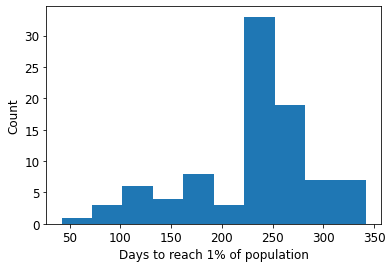

In [52]:
countries_data['time for spread'].hist()

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plt.xlabel('Days to reach 1% of population')
plt.ylabel('Count')
plt.grid()
plt.show()

### Dealing With Categorical Data

Three categorical features exist in the dataset: climate, lockdown type, and continent.

We used one hot encoder to transform these features to numerical values.

In [81]:
countries_data=countries_data.reset_index()
countries_data.drop('index',axis='columns', inplace=True)

In [82]:
countries_data

,Country,Population,Density,total_cases,total_tests,tests_per_case,extreme_poverty,human_development_index,hospital_beds_per_thousand,continent,...,Climate,Tourism,Latitude,Longtitude,Lockdown_Type,GDP 2018,HF score 2017,literacy rate,time for spread,time for lockdown
0,South Africa,59436725.0,49.0,1192570.0,7043680.000,3.200000,18.9,0.699,2.32,Africa,...,1.0,10472000,-30.559482,22.937506,Full,13686.88236,7.08,94.3,308.0,20.0
1,Armenia,2964219.0,104.0,59995.0,5965160.125,12.211111,1.8,0.755,4.20,Asia,...,4.0,1652000,40.069099,45.038189,Full,10343.17559,7.42,99.8,227.0,22.0
2,Azerbaijan,10154978.0,123.0,203593.0,5965160.125,12.211111,1.3,0.757,4.70,Asia,...,1.0,2633000,40.143105,47.576927,Full,18044.13678,6.22,99.8,294.0,0.0
3,Bahrain,1711057.0,2239.0,34560.0,685318.000,14.100000,1.3,0.846,2.00,Asia,...,1.0,12045000,25.930414,50.637772,Full,47303.04851,6.63,95.7,141.0,0.0
4,Georgia,3987805.0,57.0,82835.0,5965160.125,12.211111,4.2,0.780,2.60,Asia,...,3.0,4757000,42.315407,43.356892,Partial,12004.57383,7.74,99.8,263.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Argentina,45267449.0,17.0,917035.0,2335693.000,2.000000,0.6,0.825,5.00,South America,...,3.0,6942000,-38.416097,-63.616672,Full,20610.56855,6.86,98.1,223.0,16.0
62,Brazil,212821986.0,25.0,4282164.0,5900000.000,5.200000,3.4,0.759,2.20,South America,...,2.0,6621000,-14.235004,-51.925280,Partial,16096.40096,6.48,92.6,197.0,19.0
63,Chile,19144605.0,26.0,383902.0,1988709.000,11.000000,1.3,0.843,2.11,South America,...,3.0,5723000,-35.675147,-71.542969,Full,25222.52778,8.15,97.3,164.0,22.0
64,Colombia,50976248.0,46.0,1025052.0,4771721.000,3.300000,4.5,0.747,1.71,South America,...,2.0,3904000,4.570868,-74.297333,Full,15012.93027,6.93,94.7,233.0,18.0


In [83]:
#---------------------------------------------------------#
#climate
from sklearn.preprocessing import LabelBinarizer
climate = countries_data["Climate"]
encoder_climate = LabelBinarizer()
climate_1hot = encoder_climate.fit_transform(climate)

climate_1hot=pd.DataFrame(data=climate_1hot,columns=["Dry", "Wet tropical","humid subtropical","wet winters"])
countries_data= pd.concat([countries_data, climate_1hot], axis=1, sort=False)
countries_data.drop('Climate',axis='columns', inplace=True)
#----------------------------------------------------------#
#lockdown Type
from sklearn.preprocessing import LabelEncoder
encoder_lockdown = LabelEncoder()
lockdown = countries_data["Lockdown_Type"]
lockdown_encoded = encoder_lockdown.fit_transform(lockdown)

from sklearn.preprocessing import OneHotEncoder
encoder2 = OneHotEncoder(sparse=False)
lockdown_1hot = encoder2.fit_transform(lockdown_encoded.reshape(-1,1))

lockdown_1hot = pd.DataFrame(data=lockdown_1hot,columns=["Full lockdown", "Partial lockdown"])
countries_data= pd.concat([countries_data, lockdown_1hot], axis=1, sort=False)
countries_data.drop('Lockdown_Type',axis='columns', inplace=True)
#-----------------------------------------------------------#
#continent
encoder_continent = LabelEncoder()
continent = countries_data["continent"]
continent_encoded = encoder_continent.fit_transform(continent)

encoder2_continent = OneHotEncoder(sparse=False)
continent_1hot = encoder2_continent.fit_transform(continent_encoded.reshape(-1,1))

continent_1hot = pd.DataFrame(data=continent_1hot,columns=["Africa","Asia","Europe","North America","South America"])
countries_data= pd.concat([countries_data, continent_1hot], axis=1, sort=False)
countries_data.drop('continent',axis='columns', inplace=True)

### Feature Scaling

In [84]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     66 non-null     object 
 1   Population                  66 non-null     float64
 2   Density                     66 non-null     float64
 3   total_cases                 66 non-null     float64
 4   total_tests                 66 non-null     float64
 5   tests_per_case              66 non-null     float64
 6   extreme_poverty             66 non-null     float64
 7   human_development_index     66 non-null     float64
 8   hospital_beds_per_thousand  66 non-null     float64
 9   reproduction_rate           66 non-null     float64
 10  total_deaths                66 non-null     float64
 11  positive_rate               66 non-null     float64
 12  Tourism                     66 non-null     int64  
 13  Latitude                    66 non-nu

View different options of scaling our data, we chose min max scaler.

Min Max scaling preserves the shape of the original distribution and doesn't reduce the importance of outliers.

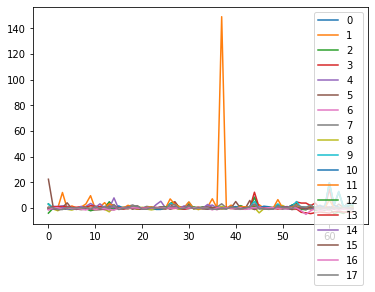

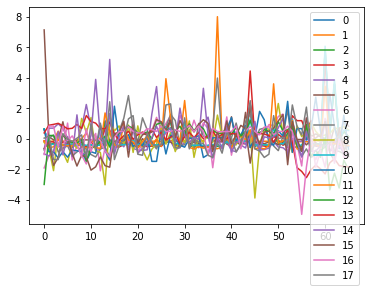

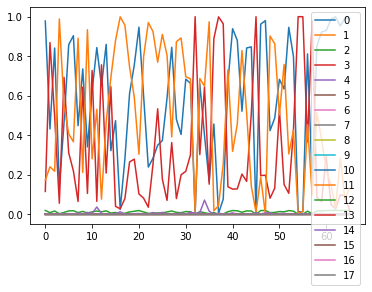

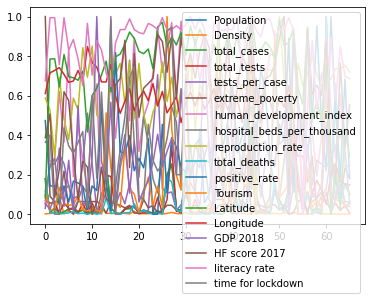

In [85]:
countries_data_categorical=countries_data.filter(items=['Country','Dry','Wet tropical','humid subtropical','wet winters','Full lockdown','Partial lockdown','Africa','Asia','Europe','North America','South America'])
countries_data_numerical=countries_data.drop(['time for spread','Country','Dry','Wet tropical','humid subtropical','wet winters','Full lockdown','Partial lockdown','Africa','Asia','Europe','North America','South America'],axis='columns',inplace=False)

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

scaled=RobustScaler().fit_transform(countries_data_numerical)
scaled2=StandardScaler().fit_transform(countries_data_numerical)
scaled3=Normalizer().fit_transform(countries_data_numerical)
scaled4=MinMaxScaler().fit_transform(countries_data_numerical)

scaled1_df=pd.DataFrame(data=scaled)
scaled2_df=pd.DataFrame(data=scaled2)
scaled3_df=pd.DataFrame(data=scaled3)
scaled4_df=pd.DataFrame(data=scaled4,columns=["Population",
                                              "Density",
                                              "total_cases",
                                              "total_tests",
                                              "tests_per_case",
                                              "extreme_poverty",
                                              "human_development_index",
                                              "hospital_beds_per_thousand",
                                              "reproduction_rate",
                                              "total_deaths",
                                              "positive_rate",
                                              #"mortality_rate",
                                              "Tourism",
                                              "Latitude",
                                              "Longitude",
                                              "GDP 2018",
                                              "HF score 2017",
                                              "literacy rate",
                                              "time for lockdown"])

scaled1_df.plot() #RobustScaler
scaled2_df.plot() #StandardScaler
scaled3_df.plot() #Normalizer
scaled4_df.plot() #min max scaling

plt.show()

 Join the two dataframes by index to get the new scaled dataset.
 
 Add the target column as we dropped it before scaling.

In [86]:
time_for_spread=countries_data['time for spread']

countries_data=scaled4_df.join(countries_data_categorical)
countries_data.insert(30,value=time_for_spread,column='time for spread')

countries_data.drop('Country',axis='columns', inplace=True)

countries_data

,Population,Density,total_cases,total_tests,tests_per_case,extreme_poverty,human_development_index,hospital_beds_per_thousand,reproduction_rate,total_deaths,...,humid subtropical,wet winters,Full lockdown,Partial lockdown,Africa,Asia,Europe,North America,South America,time for spread
0,0.179298,0.001709,0.179699,0.067110,0.029925,1.000000,0.050388,0.093923,0.587719,0.164489,...,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,308.0
1,0.008845,0.003798,0.008943,0.056707,0.254641,0.090426,0.267442,0.242305,0.526316,0.005292,...,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,227.0
2,0.030549,0.004519,0.030593,0.056707,0.254641,0.063830,0.275194,0.281768,0.289474,0.011415,...,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,294.0
3,0.005062,0.084874,0.005108,0.005783,0.301746,0.063830,0.620155,0.068666,0.692982,0.000578,...,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,141.0
4,0.011934,0.002013,0.012386,0.056707,0.254641,0.218085,0.364341,0.116022,0.482456,0.003704,...,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.136530,0.000494,0.138157,0.021701,0.000000,0.026596,0.538760,0.305446,0.684211,0.124648,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,223.0
62,0.642268,0.000797,0.645511,0.056079,0.079800,0.175532,0.282946,0.084451,0.736842,0.661534,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,197.0
63,0.057683,0.000835,0.057778,0.018354,0.224439,0.063830,0.608527,0.077348,0.736842,0.052723,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,164.0
64,0.153762,0.001595,0.154442,0.045197,0.032419,0.234043,0.236434,0.045777,0.754386,0.153952,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,233.0


Notice that we don't need the country name anymore, it was used just as an index when joining dataframes.

In [88]:
corr_matrix = countries_data.corr()
corr_matrix["time for spread"].sort_values(ascending=False)

time for spread               1.000000
time for lockdown             0.407243
Latitude                      0.380231
hospital_beds_per_thousand    0.294899
Europe                        0.264645
reproduction_rate             0.244301
HF score 2017                 0.189730
positive_rate                 0.163862
Tourism                       0.154895
tests_per_case                0.146898
total_tests                   0.137600
Africa                        0.126552
wet winters                   0.105188
Longitude                     0.093732
Full lockdown                 0.088607
humid subtropical             0.078423
Density                       0.071502
human_development_index       0.065885
North America                 0.051150
literacy rate                 0.028427
extreme_poverty               0.024488
Wet tropical                 -0.000424
total_cases                  -0.024564
Population                   -0.025677
total_deaths                 -0.084898
Partial lockdown         

### LOOCV

In [29]:
target = countries_data['time for spread'].copy()
countries_data = countries_data.drop("time for spread", inplace = False, axis = 1)

In [30]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

loo = LeaveOneOut()
results = np.array([])

average_MAE = np.float64(0)

for train_index, test_index in loo.split(countries_data):
    train_set = countries_data.loc[train_index]
    test_set = countries_data.loc[test_index]
    train_target = target[train_index]
    test_target = target[test_index]
    
    
    model = Ridge(alpha=0.8,tol=0.001)                                              
    model2 = linear_model.Lasso(alpha= 0.5, max_iter= 20000, selection='random',tol= 0.0001)
    model3 = ElasticNet(l1_ratio=0.1,tol=0.00001,max_iter=100000)                           
            #LinearRegression() 
            #alpha 0.5 2% 0.8 1%#
            #  
            #linear_model.SGDRegressor(eta0=0.01,alpha= 0.1, epsilon=0.2, max_iter= 1000, tol= 0.001)
            #l1 0.4 2% 0.1 1%#
            #c 85 1% 500 2%#SVR(kernel='rbf',C=85, epsilon= 0.5, tol= 0.0001)
            #c 45 1 500 2%%SVR(kernel='linear',C=45, epsilon= 0.3, tol= 0.0001)
            #c=0.01 1% c 200 2%#SVR(kernel='poly',C=0.01, epsilon= 0.8, tol= 0.0001)
            
    #model.fit(train_set , train_target)
    
    model.fit(train_set , train_target)
    model2.fit(train_set , train_target)
    model3.fit(train_set , train_target)
    
    predictions = model.predict(test_set)
    predictions2 = model2.predict(test_set)
    predictions3 = model3.predict(test_set)
    
    avg_predictions = (predictions + predictions2 + predictions3)/3
    
    training_predictions = model.predict(train_set)
    #predictions = model.predict(test_set)
    
    #Accuracy_MAE = 100-100*(mean_absolute_error(test_target, predictions)/test_target)
    
    Accuracy_MAE = 100-100*(mean_absolute_error(test_target, avg_predictions)/test_target)
    
   # if Accuracy_MAE.item()<50:
   #     predictions[0] = training_predictions.mean()
   #     Accuracy_MAE = 100-100*(mean_absolute_error(test_target, predictions)/test_target)
      #  print("WARNING!!!!!!!!!!")
        
    if Accuracy_MAE.item()<0:
        Accuracy_MAE[test_index[0]]=0.0
     
    results = np.append(results,[Accuracy_MAE])
    average_MAE = average_MAE + Accuracy_MAE[test_index[0]]
    
    #print("set", test_index)
    #print("MAE:", Accuracy_MAE)
    #print(" Target: ", test_target,'\n', "Prediction: ", predictions,"\n")

print("Average MAE: ", average_MAE/91)
print("KOKO:", results.mean(),"\nTOTOTOT:", np.median(results))

Average MAE:  75.4894802601012
KOKO: 75.48948026010119 
TOTOTOT: 87.47841719324065


In [31]:
training_predictions.mean()

228.2555555555556

In [32]:
predictions[0]

179.9204215084605

In [33]:
Accuracy_MAE.item()

62.21239520108685

# -----------------------------------------------

In [35]:
countries_data

,Population,Density,total_cases,total_tests,tests_per_case,extreme_poverty,human_development_index,hospital_beds_per_thousand,reproduction_rate,total_deaths,...,Wet tropical,humid subtropical,wet winters,Full lockdown,Partial lockdown,Africa,Asia,Europe,North America,South America
0,0.007020,0.000038,0.007149,0.043817,0.002202,0.381915,0.353425,0.083969,0.719298,0.001305,...,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.003406,0.002430,0.003373,0.043817,0.002202,0.381915,0.000000,0.106870,0.885965,0.002177,...,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.020686,0.000038,0.020386,0.043817,0.002122,0.381915,0.323288,0.229008,0.780702,0.006912,...,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.111533,0.003038,0.110478,0.069704,0.003289,0.047872,0.216438,0.030534,0.587719,0.044971,...,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.007590,0.000000,0.007580,0.002322,0.002228,0.707447,0.161644,0.131080,0.719298,0.001620,...,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.002274,0.000038,0.002238,0.016949,0.001764,0.147163,0.180822,0.068702,0.735965,0.001305,...,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
87,0.021471,0.000570,0.021138,0.005586,0.001061,0.085106,0.312329,0.045802,0.833333,0.011626,...,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
88,0.099655,0.000873,0.098978,0.004912,0.001379,0.180851,0.443836,0.068702,0.719298,0.089634,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
89,0.001671,0.000038,0.001643,0.016949,0.001764,0.147163,0.361644,0.183206,0.859649,0.000865,...,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Splitting The Dataset to Training and Testing
* Apply *stratified* sampling method to split the data. The categories were based on the population attribute to make sure that the test set has a variety of instances thus eliminating any possible bias.

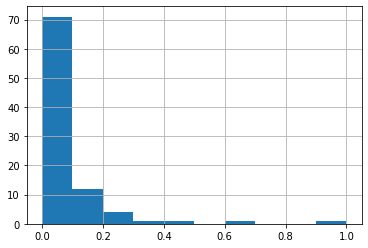

In [34]:
countries_data["Population"].hist()
plt.show()

In [5843]:
##BEST ONE#### 1%
#countries_data['Population_cat']=countries_data["Population"]
#countries_data["Population_cat"].where(countries_data["Population"] < 0.35, 6, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.3) | (countries_data["Population"] >= 0.35), 5, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.2) | (countries_data["Population"] >= 0.3), 5, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.06) | (countries_data["Population"] >= 0.2), 4, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.015) | (countries_data["Population"] >= 0.06), 3, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.0018) | (countries_data["Population"] >= 0.015), 2, inplace=True)
##countries_data["Population_cat"].where((countries_data["Population"] < 0.0008) | (countries_data["Population"] >= 0.001), 2, inplace=True)
#countries_data["Population_cat"].where(countries_data["Population"] > 0.0018, 1, inplace=True)
#countries_data['Population_cat'].hist()

In [5844]:
##BEST ONE####
#countries_data['Population_cat']=countries_data["Population"]
#countries_data["Population_cat"].where(countries_data["Population"] < 0.35, 6, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.3) | (countries_data["Population"] >= 0.35), 5, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.2) | (countries_data["Population"] >= 0.3), 5, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.06) | (countries_data["Population"] >= 0.2), 4, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.015) | (countries_data["Population"] >= 0.06), 3, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.002) | (countries_data["Population"] >= 0.015), 2, inplace=True)
##countries_data["Population_cat"].where((countries_data["Population"] < 0.0008) | (countries_data["Population"] >= 0.001), 2, inplace=True)
#countries_data["Population_cat"].where(countries_data["Population"] > 0.002, 1, inplace=True)
#countries_data['Population_cat'].hist()

In [5845]:
#countries_data['Population_cat']=countries_data["Population"]
#countries_data["Population_cat"].where(countries_data["Population"] < 0.4, 6, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.3) | (countries_data["Population"] >= 0.4), 5, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.2) | (countries_data["Population"] >= 0.3), 5, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.08) | (countries_data["Population"] >= 0.2), 4, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.015) | (countries_data["Population"] >= 0.08), 3, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.001) | (countries_data["Population"] >= 0.015), 2, inplace=True)
##countries_data["Population_cat"].where((countries_data["Population"] < 0.0008) | (countries_data["Population"] >= 0.001), 2, inplace=True)
#countries_data["Population_cat"].where(countries_data["Population"] > 0.001, 1, inplace=True)
#countries_data['Population_cat'].hist()

In [5846]:
#countries_data['Population_cat']=countries_data["Population"]
#countries_data["Population_cat"].where(countries_data["Population"] < 0.6, 6, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.2) | (countries_data["Population"] >= 0.6), 5, inplace=True)
##countries_data["Population_cat"].where((countries_data["Population"] < 0.2) | (countries_data["Population"] >= 0.3), 5, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.05) | (countries_data["Population"] >= 0.2), 4, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.015) | (countries_data["Population"] >= 0.05), 3, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.001) | (countries_data["Population"] >= 0.015), 2, inplace=True)
##countries_data["Population_cat"].where((countries_data["Population"] < 0.0008) | (countries_data["Population"] >= 0.001), 2, inplace=True)
#countries_data["Population_cat"].where(countries_data["Population"] > 0.001, 1, inplace=True)
#countries_data['Population_cat'].hist()

<AxesSubplot:>

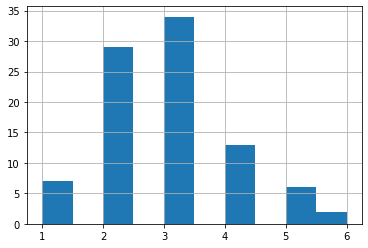

In [5847]:
countries_data['Population_cat']=countries_data["Population"]
countries_data["Population_cat"].where(countries_data["Population"] < 0.6, 6, inplace=True)
countries_data["Population_cat"].where((countries_data["Population"] < 0.2) | (countries_data["Population"] >= 0.6), 5, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.2) | (countries_data["Population"] >= 0.3), 5, inplace=True)
countries_data["Population_cat"].where((countries_data["Population"] < 0.08) | (countries_data["Population"] >= 0.2), 4, inplace=True)
countries_data["Population_cat"].where((countries_data["Population"] < 0.015) | (countries_data["Population"] >= 0.08), 3, inplace=True)
countries_data["Population_cat"].where((countries_data["Population"] < 0.001) | (countries_data["Population"] >= 0.015), 2, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.0008) | (countries_data["Population"] >= 0.001), 2, inplace=True)
countries_data["Population_cat"].where(countries_data["Population"] > 0.001, 1, inplace=True)
countries_data['Population_cat'].hist()

* After applying the stratified shuffle split, drop the category feature that was created based on the population.

In [5848]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(countries_data, countries_data["Population_cat"]):
    train_set = countries_data.loc[train_index]
    test_set = countries_data.loc[test_index]

for set in (train_set, test_set):
    set.drop(["Population_cat"], axis=1, inplace=True)
    
#countries_data = countries_data.drop('Population_cat',axis='columns', inplace=True)

* The figure below shows how the test and training sets are constructed from the countries_data dataset. It can be clearly seen how the stratified shuffle split allowed the test set to be similar to the original dataset and not biased.

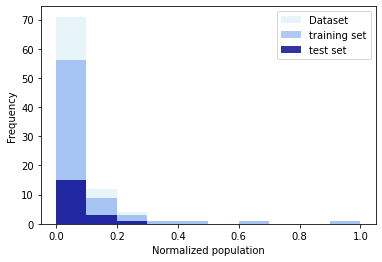

In [5849]:
plt.hist(countries_data['Population'], alpha=0.2, color='skyblue',bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.hist(train_set['Population'], alpha=0.5,color='cornflowerblue',bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.hist(test_set['Population'], alpha=0.8,bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],color='darkblue')

plt.legend(["Dataset","training set","test set"])
plt.xlabel("Normalized population")
plt.ylabel("Frequency")
plt.show()

* Copy the training set to analyze it without any worries about ruining it.

In [5850]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 11 to 36
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population                  72 non-null     float64
 1   Density                     72 non-null     float64
 2   total_cases                 72 non-null     float64
 3   total_tests                 72 non-null     float64
 4   tests_per_case              72 non-null     float64
 5   extreme_poverty             72 non-null     float64
 6   human_development_index     72 non-null     float64
 7   hospital_beds_per_thousand  72 non-null     float64
 8   reproduction_rate           72 non-null     float64
 9   total_deaths                72 non-null     float64
 10  positive_rate               72 non-null     float64
 11  mortality_rate              72 non-null     float64
 12  Tourism                     72 non-null     float64
 13  Latitude                    72 non-n

In [5851]:
countriesData = train_set.copy()
test_target = test_set["time for spread"].copy()
test_set = test_set.drop(['time for spread'], axis='columns', inplace=False)

training_target = train_set['time for spread'].copy()

In [5852]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 11 to 36
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population                  72 non-null     float64
 1   Density                     72 non-null     float64
 2   total_cases                 72 non-null     float64
 3   total_tests                 72 non-null     float64
 4   tests_per_case              72 non-null     float64
 5   extreme_poverty             72 non-null     float64
 6   human_development_index     72 non-null     float64
 7   hospital_beds_per_thousand  72 non-null     float64
 8   reproduction_rate           72 non-null     float64
 9   total_deaths                72 non-null     float64
 10  positive_rate               72 non-null     float64
 11  mortality_rate              72 non-null     float64
 12  Tourism                     72 non-null     float64
 13  Latitude                    72 non-n

### Analyzing Correlations

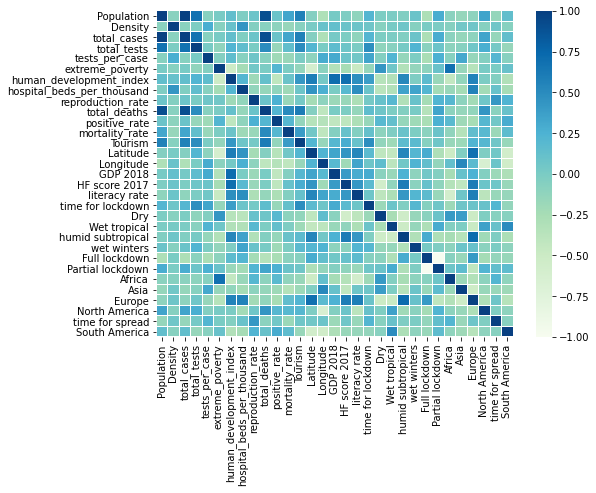

In [5853]:
countriesData = countriesData.reset_index()
countriesData.drop('index',axis='columns', inplace=True)

corr_matrix = countriesData.corr()
fig, ax = plt.subplots(figsize=(8,6))         # Sample figsize in inches 
heat_map = sns.heatmap(corr_matrix, linewidths=0.01,ax=ax, cmap='GnBu')

In [5854]:
corr_matrix["time for spread"].sort_values(ascending=False)

time for spread               1.000000
reproduction_rate             0.426705
time for lockdown             0.225021
Africa                        0.222117
tests_per_case                0.216052
Partial lockdown              0.137983
Wet tropical                  0.102506
hospital_beds_per_thousand    0.098866
Longitude                     0.085294
Europe                        0.069256
HF score 2017                 0.061157
Tourism                       0.059524
Density                       0.055541
Latitude                      0.050604
positive_rate                 0.047690
total_tests                   0.026083
extreme_poverty               0.006944
wet winters                  -0.000068
humid subtropical            -0.018508
North America                -0.028747
human_development_index      -0.045860
South America                -0.076945
Dry                          -0.077070
total_deaths                 -0.087786
Full lockdown                -0.137983
Population               

### Taking a look at the data before fitting it in a ML model

In [5855]:
#%matplotlib inline 
#countriesData[{'time for spread'
#               ,'time for lockdown'
#               ,'Latitude'
#               ,'hospital_beds_per_thousand'
#               ,'reproduction_rate'          
#               ,'tests_per_case'                
#               ,'Tourism'                                           
#               ,'HF score 2017'                 
#               ,'total_tests'                   
#               ,'Longitude'                                    
#               ,'literacy rate'                 
#               ,'extreme_poverty'              
#               ,'human_development_index'       
#               ,'positive_rate'                 
#               ,'total_cases'                
#               ,'Population'                   
#               ,'total_deaths'                 
#               ,'GDP 2018'                     
#               ,'Density'}].hist(bins=10, figsize=(20,20))
#plt.show()

In [5856]:
#training_data['Population'].hist()

In [5857]:
#test_set['Population'].hist()

### Selecting and Training Models

*Not all models were mentioned in the paper, only the ones that gave good results in the test set.*

In [5858]:
training_data=countriesData.drop('time for spread',axis='columns', inplace=False)

### Linear Regression

First, we used linear regression model to train our data. 

Grid search was used to find the best hyperparameter, which was n_jobs. The results was n_jobs=1, the default value.

#### Spreading Speed:

In [5859]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

lin_reg = LinearRegression()
lin_reg.fit(training_data, training_target)

lin_predictions = lin_reg.predict(training_data)

There are different metrics that can be used to quantify the quality of our predictions. 

In [5860]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,lin_predictions))

from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,lin_predictions)))

from sklearn.metrics import median_absolute_error
print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,lin_predictions))

Mean Absolute Error (MAE)		: 28.070484217432004
Root Mean Squared Error (RMSE)		: 35.719263138481345
Median Absolute Error (MAE)		: 21.156582898686565


Here we can compare between our predictions and some actual targets. 

In [5861]:
some_data = training_data.iloc[:5]
some_labels = training_target.iloc[:5]
print("Predictions:\t", lin_reg.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [258.38760289 285.38611811 153.08941408 169.67768546 244.08340564]
Labels:		 [248.0, 279.0, 91.0, 231.0, 224.0]


Cross Validation

In [5862]:
def display_scores(scores):
    print("Scores\t:", scores)
    print("Mean\t:", scores.mean())
    print("Standard deviation:", scores.std())

lin_scores = cross_val_score(lin_reg, training_data, training_target,scoring="neg_mean_absolute_error", cv=10)
lin_scores = -lin_scores

display_scores(lin_scores)

Scores	: [ 26.30417225  43.53306102  38.09418875  42.68061152  61.73748169
 193.13951437  68.76897402  45.22330549  67.83028229  60.48414885]
Mean	: 64.7795740249722
Standard deviation: 44.770407468195806


### Ridge Regression

In [5863]:
from sklearn.linear_model import Ridge

Ridge_reg = Ridge(alpha=0.6,tol=0.001)
Ridge_reg.fit(training_data,training_target)

Ridge_predictions = Ridge_reg.predict(training_data)

In [5864]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,Ridge_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,Ridge_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,Ridge_predictions))

Mean Absolute Error (MAE)		: 31.646227143392593
Root Mean Squared Error (RMSE)		: 41.898345656413795
Median Absolute Error (MAE)		: 23.40918664069619


In [5865]:
#param_grid_Ridge = [{'alpha':[0.5,1,2,3,4],
#                     'tol':[0.001,0.0001,0.00001]}]
#
#grid_search_Ridge = GridSearchCV(Ridge_reg, param_grid_Ridge, cv=10,scoring='neg_mean_absolute_error')
#grid_search_Ridge.fit(training_data, training_target)
#print(grid_search_Ridge.best_params_)

In [5866]:
#Ridge_scores = cross_val_score(Ridge_reg, training_data, training_target,scoring="neg_root_mean_squared_error", cv=10)
#Ridge_scores = -Ridge_scores
#display_scores(Ridge_scores)

### Lasso Regression

In [5867]:
from sklearn import linear_model

Lasso_reg = linear_model.Lasso(alpha= 0.6, max_iter= 20000, selection='random',tol= 0.001)
Lasso_reg.fit(training_data,training_target)

Lasso_predictions = Lasso_reg.predict(training_data)

In [5868]:
#param_grid_Lasso = [{'alpha': [0.1,0.7,0.5,0.2],
#                     'max_iter': [1000,15000,20000,2500,10000],
#                     'tol': [0.002,0.005,0.001,0.0065],
#                     'selection': ['random']}]
#
#grid_search_Lasso = GridSearchCV(Lasso_reg, param_grid_Lasso, cv=10,scoring='neg_mean_absolute_error')
#grid_search_Lasso.fit(training_data, training_target)
#print(grid_search_Lasso.best_params_)

In [5869]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,Lasso_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,Lasso_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,Lasso_predictions))

Mean Absolute Error (MAE)		: 34.40985904422905
Root Mean Squared Error (RMSE)		: 44.25410921715249
Median Absolute Error (MAE)		: 27.368261383095856


In [5870]:
print("Predictions:\t", Lasso_reg.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [242.66513826 264.66875138 173.74746688 196.42289818 226.77790593]
Labels:		 [248.0, 279.0, 91.0, 231.0, 224.0]


In [5871]:
#Lasso_scores = cross_val_score(Lasso_reg, training_data, training_target,scoring="neg_root_mean_squared_error", cv=10)
#Lasso_scores = -Lasso_scores
#display_scores(Lasso_scores)

### SGD

SGD was not included in the paper as we focused more on the comparison between different SVM kernels and different Regularized Linear Regression models 

In [5872]:
from sklearn.linear_model import SGDRegressor

SGD_reg=linear_model.SGDRegressor(eta0=0.01,alpha= 0.0001, epsilon=0.2, max_iter= 10000000, tol= 0.001)
SGD_reg.fit(training_data,training_target)

SGD_predictions = SGD_reg.predict(training_data)

In [5873]:
#param_grid_SGD = [{'alpha':[0.1,0.01,0.0001,0.00001],
#                   'max_iter':[1000000,10000000],
#                   'tol':[0.01,0.001,0.0001],
#                   'epsilon':[0.1,0.2,0.3,0.4,0.5],
#                   'eta0':[0.1,0.01,0.05]}]
#
#   
#
#grid_search_SGD = GridSearchCV(SGD_reg, param_grid_SGD, cv=5,scoring='neg_mean_absolute_error')
#grid_search_SGD.fit(training_data, training_target)
#print(grid_search_SGD.best_params_)

In [5874]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,SGD_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,SGD_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,SGD_predictions))

Mean Absolute Error (MAE)		: 31.59347260480482
Root Mean Squared Error (RMSE)		: 42.571523026217115
Median Absolute Error (MAE)		: 20.37216245840993


In [5875]:
print("Predictions:\t", SGD_reg.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [241.85972096 270.53882479 168.9485121  192.9523424  222.48819357]
Labels:		 [248.0, 279.0, 91.0, 231.0, 224.0]


In [5876]:
#SGD_scores = cross_val_score(SGD_reg, training_data, training_target,scoring="neg_mean_absolute_error", cv=10)
#SGD_scores = -SGD_scores
#
#display_scores(SGD_scores)

### Elastics Net

In [5877]:
from sklearn.linear_model import ElasticNet

Elastic_reg = ElasticNet(l1_ratio=1,tol=0.0001,max_iter=10000)
Elastic_reg.fit(training_data, training_target)

Elastic_predictions = Elastic_reg.predict(training_data)

In [5878]:
#param_grid_Elastic = [{'l1_ratio':[1,0.8,0.6,0.4],
#                       'max_iter':[1000,10000,100000],
#                       'tol':[0.001,0.00001,0.0001]}]
#   
#
#grid_search_Elastic = GridSearchCV(Elastic_reg, param_grid_Elastic, cv=5,scoring='neg_mean_absolute_error')
#grid_search_Elastic.fit(training_data, training_target)
#print(grid_search_Elastic.best_params_)

In [5879]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,Elastic_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,Elastic_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,Elastic_predictions))

Mean Absolute Error (MAE)		: 36.558060784609445
Root Mean Squared Error (RMSE)		: 47.18524264540057
Median Absolute Error (MAE)		: 26.77930384675396


In [5880]:
#Elastic_scores = cross_val_score(Elastic_reg, training_data, training_target,scoring="neg_root_mean_squared_error", cv=10)
#Elastic_scores = -Elastic_scores
#
#display_scores(Elastic_scores)

### RBF SVM

In [5881]:
from sklearn.svm import SVR

SVM_rbf_reg = SVR(kernel='rbf',C=20, epsilon= 0.3, tol= 0.0001)
SVM_rbf_reg.fit(training_data, training_target)

SVM_rbf_predictions = SVM_rbf_reg.predict(training_data)

print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,SVM_rbf_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,SVM_rbf_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,SVM_rbf_predictions))

Mean Absolute Error (MAE)		: 37.70423651714084
Root Mean Squared Error (RMSE)		: 56.65000100987689
Median Absolute Error (MAE)		: 24.46914663823391


### Linear SVM

SVR with kernel 'linear' was used instead of LinearSVR as our dataset is small

In [5882]:
from sklearn.svm import SVR

SVM_reg = SVR(kernel='linear',C=20, epsilon= 0.3, tol= 0.0001)
SVM_reg.fit(training_data, training_target)

SVM_predictions = SVM_reg.predict(training_data)

In [5883]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,SVM_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,SVM_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,SVM_predictions                                                              ))

Mean Absolute Error (MAE)		: 34.60316040801137
Root Mean Squared Error (RMSE)		: 51.254996117373985
Median Absolute Error (MAE)		: 20.908916036571554


### Polynomial SVM

In [5884]:
from sklearn.svm import SVR

SVM_poly_reg = SVR(kernel='poly',C=20, degree= 2, epsilon= 0.3, tol= 0.0001)
SVM_poly_reg.fit(training_data, training_target)

SVM_poly_predictions = SVM_poly_reg.predict(training_data)

In [5885]:
#param_grid_SVM_poly = [{'C':[10,20,5,40,50],
#                     'degree':[2,3,4,5],
#                     'tol':[0.01,0.001,0.0001],
#                     'epsilon':[0.3,0.1,0.5]
#                      }]
#   
#
#grid_search_SVM_poly = GridSearchCV(SVM_poly_reg, param_grid_SVM_poly, cv=10,scoring='neg_mean_absolute_error')
#grid_search_SVM_poly.fit(training_data, training_target)
#print(grid_search_SVM_poly.best_params_)

In [5886]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,SVM_poly_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,SVM_poly_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,SVM_poly_predictions))

Mean Absolute Error (MAE)		: 34.57389050867798
Root Mean Squared Error (RMSE)		: 52.27236104563006
Median Absolute Error (MAE)		: 21.51378485542797


### Ensemble

Ensemble method was not included in the paper as it did not give any improvement regarding our predictions

In [5887]:
ensemble_test=(lin_predictions+Lasso_predictions+Ridge_predictions+SVM_predictions+SVM_poly_predictions+Elastic_predictions+SGD_predictions)/7

print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,ensemble_test))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,ensemble_test)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,ensemble_test))

Mean Absolute Error (MAE)		: 31.78277807244313
Root Mean Squared Error (RMSE)		: 42.87742715062458
Median Absolute Error (MAE)		: 22.23190294220663


In [5888]:
ensemble_median = np.stack([lin_predictions, Lasso_predictions, Ridge_predictions, SVM_predictions, SVM_poly_predictions, Elastic_predictions, SGD_predictions])
ensemble_median=np.median(ensemble_median, axis = 0)

print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,ensemble_median))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,ensemble_median)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,ensemble_median))

Mean Absolute Error (MAE)		: 32.34640977091639
Root Mean Squared Error (RMSE)		: 43.121618735223436
Median Absolute Error (MAE)		: 25.727972227620526


In [5889]:
Accuracy_train_MAE_lin_reg = 100-100*(mean_absolute_error(training_target, lin_predictions)/training_target.mean())
Accuracy_train_medAE_lin_reg = 100-100*(median_absolute_error(training_target, lin_predictions)/training_target.mean())

Accuracy_train_MAE_Lasso = 100-100*(mean_absolute_error(training_target, Lasso_predictions)/training_target.mean())
Accuracy_train_medAE_Lasso = 100-100*(median_absolute_error(training_target, Lasso_predictions)/training_target.mean())

Accuracy_train_MAE_Ridge = 100-100*(mean_absolute_error(training_target, Ridge_predictions)/training_target.mean())
Accuracy_train_medAE_Ridge = 100-100*(median_absolute_error(training_target, Ridge_predictions)/training_target.mean())

Accuracy_train_MAE_Net = 100-100*(mean_absolute_error(training_target, Elastic_predictions)/training_target.mean())
Accuracy_train_medAE_Net = 100-100*(median_absolute_error(training_target, Elastic_predictions)/training_target.mean())

Accuracy_train_MAE_Poly = 100-100*(mean_absolute_error(training_target, SVM_poly_predictions)/training_target.mean())
Accuracy_train_medAE_Poly = 100-100*(median_absolute_error(training_target, SVM_poly_predictions)/training_target.mean())

Accuracy_train_MAE_SVM_lin = 100-100*(mean_absolute_error(training_target, SVM_predictions)/training_target.mean())
Accuracy_train_medAE_SVM_lin = 100-100*(median_absolute_error(training_target, SVM_predictions)/training_target.mean())

Accuracy_train_MAE_RBF = 100-100*(mean_absolute_error(training_target, SVM_rbf_predictions)/training_target.mean())
Accuracy_train_medAE_RBF = 100-100*(median_absolute_error(training_target, SVM_rbf_predictions)/training_target.mean())

In [5890]:
print("Lin reg MAE:", Accuracy_train_MAE_lin_reg)
print("Lin reg MedAE:",Accuracy_train_medAE_lin_reg,"\n")
print("Lasso MAE:",Accuracy_train_MAE_Lasso)
print("Lasso MedAE:",Accuracy_train_medAE_Lasso,"\n" )
print("Ridge MAE:",Accuracy_train_MAE_Ridge )
print("Ridge MedAE:",Accuracy_train_medAE_Ridge,"\n" )
print("Elastic MAE:",Accuracy_train_MAE_Net )
print("Elastic MedAE:",Accuracy_train_medAE_Net,"\n" )
print("SVM Poly MAE:",Accuracy_train_MAE_Poly )
print("SVM Poly MedAE:",Accuracy_train_medAE_Poly,"\n" )
print("SVM Lin MAE:",Accuracy_train_MAE_SVM_lin) 
print("SVM Lin MedAE:",Accuracy_train_medAE_SVM_lin,"\n") 
print("SVM RBF MAE:",Accuracy_train_MAE_RBF )
print("SVM RBF MedAE:",Accuracy_train_medAE_RBF )

Lin reg MAE: 87.86651339583896
Lin reg MedAE: 90.85505211799584 

Lasso MAE: 85.12631415510302
Lasso MedAE: 88.17004971133517 

Ridge MAE: 86.32089599373077
Ridge MedAE: 89.88136256150491 

Elastic MAE: 84.19775243746244
Elastic MedAE: 88.42462702187498 

SVM Poly MAE: 85.05541143888567
SVM Poly MedAE: 90.70065132022084 

SVM Lin MAE: 85.04275950425156
SVM Lin MedAE: 90.96210629385152 

SVM RBF MAE: 83.70231716855292
SVM RBF MedAE: 89.42319410486377


## Testing

After training our models let's finally test it on data that it has never seen before.


Mean Absolute Error was chosen as the preformance measure. Mean root square error was not recommended as it's sensitive to outliers, which occur in our case.  

The procedure is simple. Just use the predictors with the test set.

In [5891]:
test_target=test_target.reset_index(drop = True)
test_set=test_set.reset_index(drop = True)

Predict the test set by every model that we trained

In [5892]:
final_predictions = SVM_poly_reg.predict(test_set)#SVM poly
final_predictions2 = SVM_reg.predict(test_set)#SVM linear
final_predictions11 = SVM_rbf_reg.predict(test_set)#SVM rbf

final_predictions3 = lin_reg.predict(test_set)#linear regression
final_predictions4 = Lasso_reg.predict(test_set)#lasso
final_predictions5 = Ridge_reg.predict(test_set)#ridge
final_predictions6 = Elastic_reg.predict(test_set)#elastic net

ensemble_predictions = (final_predictions4 + final_predictions5 + final_predictions6)/3 #ensemble linear

final_predictions7 = SGD_reg.predict(test_set)#SGD

Convert to pandas dataframe to apply error functions

In [5893]:
final_predictions=pd.DataFrame(data=final_predictions,columns=['time for spread'])#SVM poly       
final_predictions2=pd.DataFrame(data=final_predictions2,columns=['time for spread'])#SVM          
final_predictions11=pd.DataFrame(data=final_predictions11,columns=['time for spread'])#SVM rbf        

final_predictions3=pd.DataFrame(data=final_predictions3,columns=['time for spread'])#linear           
final_predictions4=pd.DataFrame(data=final_predictions4,columns=['time for spread'])#Lasso         
final_predictions5=pd.DataFrame(data=final_predictions5,columns=['time for spread'])#Ridge           
final_predictions6=pd.DataFrame(data=final_predictions6,columns=['time for spread'])#Elastic net        

ensemble_predictions = pd.DataFrame(data=ensemble_predictions,columns=['time for spread'])#ensemble linear   

final_predictions7=pd.DataFrame(data=final_predictions7,columns=['time for spread'])#SGD           

Find the Mean Absolute Error and the Median Absolute Error of each model.

## MAE

In [5894]:
MAE_SVM_poly=mean_absolute_error(test_target,final_predictions)
MAE_SVM_lin=mean_absolute_error(test_target,final_predictions2)
MAE_SVM_RBF=mean_absolute_error(test_target,final_predictions11)

MAE_Lin_reg=mean_absolute_error(test_target,final_predictions3)
MAE_Lasso=mean_absolute_error(test_target,final_predictions4)
MAE_Ridge=mean_absolute_error(test_target,final_predictions5)
MAE_Elastic=mean_absolute_error(test_target,final_predictions6)

MAE_ensemble = mean_absolute_error(test_target,ensemble_predictions)

MAE_SGD=mean_absolute_error(test_target,final_predictions7)

In [5895]:
print("Mean Absolute Error SVM polynomial\t\t:",mean_absolute_error(test_target,final_predictions))
print("Mean Absolute Error SVM\t\t\t\t:",mean_absolute_error(test_target,final_predictions2))
print("Mean Absolute Error SVR rbf\t\t\t:",mean_absolute_error(test_target,final_predictions11))

print("\nMean Absolute Error Linear regression\t\t:",mean_absolute_error(test_target,final_predictions3))
print("Mean Absolute Error Lasso regression\t\t:",mean_absolute_error(test_target,final_predictions4))
print("Mean Absolute Error Ridge regression\t\t:",mean_absolute_error(test_target,final_predictions5))
print("Mean Absolute Error Elastic net\t\t\t:",mean_absolute_error(test_target,final_predictions6))

print("Mean Absolute Error ensemble linear\t\t\t:",mean_absolute_error(test_target,ensemble_predictions))

print("\nMean Absolute Error SGD\t\t\t\t:",mean_absolute_error(test_target,final_predictions7))

Mean Absolute Error SVM polynomial		: 44.105176794209115
Mean Absolute Error SVM				: 43.2427896997216
Mean Absolute Error SVR rbf			: 43.845633975036804

Mean Absolute Error Linear regression		: 54.73446101860549
Mean Absolute Error Lasso regression		: 48.64136999747121
Mean Absolute Error Ridge regression		: 47.993461254507935
Mean Absolute Error Elastic net			: 48.25450034586349
Mean Absolute Error ensemble linear			: 46.8527742537528

Mean Absolute Error SGD				: 49.87521063197146


In [5896]:
test_target.mean()

220.94736842105263

Calculate the accuracy of our predictions. 

$Percentage Error =100* \frac{MAE}{Mean \ Target \ Values}$

$Accuracy = 100 \ – Percentage Error $

In [5897]:
Accuracy_SVM_Poly = 100-100*(MAE_SVM_poly/test_target.mean())
Accuracy_SVM_lin = 100-100*(MAE_SVM_lin/test_target.mean())
Accuracy_SVM_RBF = 100-100*(MAE_SVM_RBF/test_target.mean())

Accuracy_Lin_reg = 100-100*(MAE_Lin_reg/test_target.mean())
Accuracy_Lasso   = 100-100*(MAE_Lasso/test_target.mean())
Accuracy_Ridge   = 100-100*(MAE_Ridge/test_target.mean())
Accuracy_Elastic_Net = 100-100*(MAE_Elastic/test_target.mean())

Accuracy_ensemble_linear = 100-100*(MAE_ensemble/test_target.mean())

Accuracy_SGD     = 100-100*(MAE_SGD/test_target.mean())

In [5898]:
print("Accuracy SVM Poly\t:",Accuracy_SVM_Poly)
print("Accuracy SVM lin\t:",Accuracy_SVM_lin )
print("Accuracy SVM RBF\t:",Accuracy_SVM_RBF )

print("\nAccuracy Lin reg\t:",Accuracy_Lin_reg )
print("Accuracy Lasso\t\t:",Accuracy_Lasso   )
print("Accuracy Ridge\t\t:",Accuracy_Ridge   )
print("Accuracy Elastic Net\t:",Accuracy_Elastic_Net)

print("Accuracy ensemble linear\t:",Accuracy_ensemble_linear)

print("\nAccuracy SGD\t\t:",Accuracy_SGD)

Accuracy SVM Poly	: 80.03815247522694
Accuracy SVM lin	: 80.42846583385635
Accuracy SVM RBF	: 80.15562064016915

Accuracy Lin reg	: 75.2273759086826
Accuracy Lasso		: 77.9850874237267
Accuracy Ridge		: 78.27832863659717
Accuracy Elastic Net	: 78.16018326413992
Accuracy ensemble linear	: 78.79459955166024

Accuracy SGD		: 77.42665550244264


Text(0, 0.5, 'Accuracy')

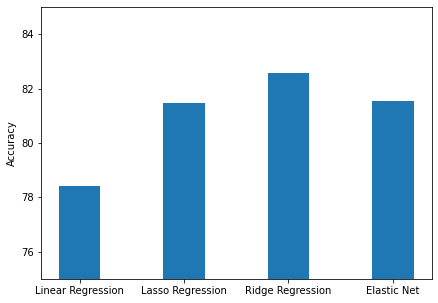

In [5899]:
names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net']
#values = [Accuracy_Lasso, Accuracy_Ridge, Accuracy_Elastic_Net] error so inserted the values manually
#values = [83.207609, 83.700748, 82.784986]  old

values = [78.411748, 81.463779, 82.560484, 81.531555]

fig, ax = plt.subplots(figsize=(7,5))

plt.bar(names, values, width= 0.4)

ax.yaxis.set_minor_formatter(plt.ScalarFormatter())
plt.ylim(bottom=75, top=85)

plt.ylabel("Accuracy")
#plt.xlabel("Model")

Text(0, 0.5, 'Accuracy')

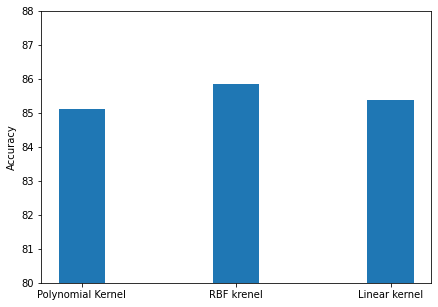

In [5900]:
names_SVM = ['Polynomial Kernel', 'RBF krenel', 'Linear kernel']
#values_SVM = [Accuracy_SVM_Poly, Accuracy_SVM_RBF, Accuracy_SVM_lin]
#values_SVM = [86.202998, 85.85229, 84.80567] old
values_SVM = [85.116036, 85.847255, 85.391127]


figSVM, axSVM = plt.subplots(figsize=(7,5))

plt.bar(names_SVM, values_SVM, width= 0.3)

axSVM.yaxis.set_minor_formatter(plt.ScalarFormatter())

plt.ylim(bottom=80, top=88)
plt.ylabel("Accuracy")

## Median

In [5901]:
Med_SVM_poly=median_absolute_error(test_target,final_predictions)    
Med_SVM_lin =median_absolute_error(test_target,final_predictions2)       
Med_SVM_RBF =median_absolute_error(test_target,final_predictions11) 

Med_Lin_reg =median_absolute_error(test_target,final_predictions3)
Med_Lasso   =median_absolute_error(test_target,final_predictions4)
Med_Ridge   =median_absolute_error(test_target,final_predictions5)
Med_Elastic =median_absolute_error(test_target,final_predictions6) 

Med_ensemble =median_absolute_error(test_target,ensemble_predictions) 

Med_SGD     =median_absolute_error(test_target,final_predictions7)          

In [5902]:
print("Median Absolute Error SVM polynomial\t\t:",Med_SVM_poly)    
print("Median Absolute Error SVM\t\t\t:",Med_SVM_lin)   
print("Median Absolute Error SVR rbf\t\t\t:",Med_SVM_RBF)   

print("\nMedian Absolute Error Linear regression\t\t:",Med_Lin_reg) 
print("Median Absolute Error Lasso regression\t\t:",Med_Lasso) 
print("Median Absolute Error Ridge regression\t\t:",Med_Ridge)  
print("Median Absolute Error Elastic net\t\t:",Med_Elastic)   

print("Median Absolute Error ensemble linear\t\t:",Med_ensemble)   

print("\nMedian Absolute Error SGD\t\t\t:",Med_SGD)               

Median Absolute Error SVM polynomial		: 18.929942205257305
Median Absolute Error SVM			: 19.27433443275828
Median Absolute Error SVR rbf			: 19.69027368248527

Median Absolute Error Linear regression		: 41.62424150969517
Median Absolute Error Lasso regression		: 28.5366607146384
Median Absolute Error Ridge regression		: 32.421285574792336
Median Absolute Error Elastic net		: 26.502457455425002
Median Absolute Error ensemble linear		: 26.1053450877412

Median Absolute Error SGD			: 40.196105163121786


In [5903]:
Accuracy_SVM_Poly_median = 100-100*(Med_SVM_poly/test_target.mean())
Accuracy_SVM_lin_median= 100-100*(Med_SVM_lin/test_target.mean())
Accuracy_SVM_RBF_median= 100-100*(Med_SVM_RBF/test_target.mean())

Accuracy_Lin_reg_median= 100-100*(Med_Lin_reg/test_target.mean())
Accuracy_Lasso_median= 100-100*(Med_Lasso/test_target.mean())
Accuracy_Ridge_median= 100-100*(Med_Ridge/test_target.mean())
Accuracy_Elastic_Net_median = 100-100*(Med_Elastic/test_target.mean())

Accuracy_ensemble_median = 100-100*(Med_ensemble/test_target.mean())

Accuracy_SGD_median     = 100-100*(Med_SGD/test_target.mean())

print("Accuracy SVM Poly\t:",Accuracy_SVM_Poly_median)
print("Accuracy SVM lin\t:",Accuracy_SVM_lin_median )
print("Accuracy SVM RBF\t:",Accuracy_SVM_RBF_median )

print("\nAccuracy Lin reg\t:",Accuracy_Lin_reg_median )
print("Accuracy Lasso\t\t:",Accuracy_Lasso_median   )
print("Accuracy Ridge\t\t:",Accuracy_Ridge_median   )
print("Accuracy Elastic Net\t:",Accuracy_Elastic_Net_median)

print("Accuracy ensemble regression\t:",Accuracy_ensemble_median)

print("\nAccuracy SGD\t\t:",Accuracy_SGD_median)

Accuracy SVM Poly	: 91.43237489519083
Accuracy SVM lin	: 91.27650418717467
Accuracy SVM RBF	: 91.08825154913721

Accuracy Lin reg	: 81.16101503848957
Accuracy Lasso		: 87.08440796621892
Accuracy Ridge		: 85.32624044971286
Accuracy Elastic Net	: 88.00508118977906
Accuracy ensemble regression	: 88.18481284737773

Accuracy SGD		: 81.80738451407066


Text(0, 0.5, 'Accuracy')

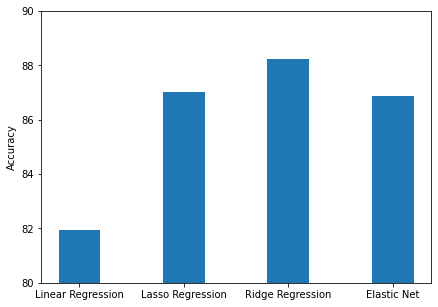

In [5904]:
names_med = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net']
#values = [Accuracy_Lasso, Accuracy_Ridge, Accuracy_Elastic_Net] error so inserted the values manually
#values_med = [85.561701, 83.755405, 85.745758] old
values_med = [81.953551, 87.028402, 88.233752, 86.860861]

#plt.figure()
fig_med, ax_med = plt.subplots(figsize=(7,5))

plt.bar(names_med, values_med, width= 0.4)

ax_med.yaxis.set_minor_formatter(plt.ScalarFormatter())
plt.ylim(bottom=80, top=90)
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

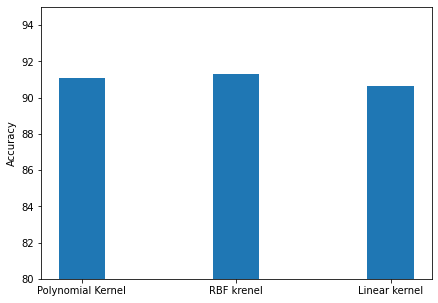

In [5905]:
names_SVM_med = ['Polynomial Kernel', 'RBF krenel', 'Linear kernel']
#values_SVM = [Accuracy_SVM_Poly, Accuracy_SVM_RBF, Accuracy_SVM_lin]
#values_SVM_med = [88.746421, 89.111174, 88.57851]
values_SVM_med = [91.087562, 91.314265, 90.637946]

#plt.figure()
figSVM_med, axSVM_med = plt.subplots(figsize=(7,5))

plt.bar(names_SVM_med, values_SVM_med, width= 0.3)

axSVM_med.yaxis.set_minor_formatter(plt.ScalarFormatter())

plt.ylim(bottom=80, top=95)
plt.ylabel("Accuracy")